In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
import os 
import warnings
from patsy import dmatrices
import statsmodels.api as sm;
from statsmodels.stats.outliers_influence import variance_inflation_factor
from pylab import rcParams

%matplotlib inline


import lightgbm as lgb
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.model_selection import StratifiedKFold,KFold
from sklearn.model_selection import train_test_split


import warnings
from six.moves import urllib
warnings.filterwarnings('ignore')
plt.style.use('seaborn')

import scipy
from scipy.stats import norm, skew

#Import the required libraries
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
#LABELS = ["Normal", "Fraud"]
import plotly.plotly as py
import plotly.graph_objs as go
import plotly
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot

In [2]:
#data = pd.read_csv('D:/FV_raw/S01_total_rev.csv')
data = pd.read_csv('C:\\Users\\\koreaw\\비즈니스어낼리틱스\\BA_data\\S01_data_rev_1.csv')
print(data.shape)
data.head(5)

(53692, 94)


,L0t,S_NO,D_ID,Class,FV1,FV2,FV3,FV4,FV5,FV6,...,FV81,FV82,FV83,FV84,FV85,FV86,FV87,FV88,FV89,FV90
0,L001,2,5,17,0.3288,0.3603,0.5044,0.3787,0.0,0.3603,...,0.0204,0.0401,0.1349,0.0328,0.7236,0.0000,0.0000,0.5,0,0
1,L001,2,9,21,0.1288,0.2876,0.4089,0.7500,0.0,0.2876,...,0.0134,0.0355,0.1392,0.0347,0.7902,0.0000,0.0018,1.0,0,0
2,L001,2,11,9,0.0844,0.2214,0.3599,0.7500,0.0,0.2214,...,0.0885,0.1007,0.1411,0.1174,0.2804,0.0028,0.0106,1.0,0,0
3,L001,2,13,21,0.1061,0.2446,0.3740,0.7901,0.0,0.2446,...,0.0384,0.0690,0.1178,0.0518,0.6053,0.0000,0.0011,1.0,0,0
4,L001,2,25,9,0.0753,0.2145,0.3599,0.6875,0.0,0.2145,...,0.0098,0.0111,0.1147,0.0054,0.9704,0.0000,0.0000,0.5,0,0


In [3]:
data2 = data.drop(['L0t','Class','S_NO','D_ID','FV89','FV90'], axis=1)
y = data['Class']
min_max_scaler = MinMaxScaler()
data2_norm=min_max_scaler.fit_transform(data2)
data2_norm = pd.DataFrame(data2_norm)
data_norm = data2_norm.merge(y.to_frame(),left_index=True, right_index = True)
data_norm.head(5)

,0,1,2,3,4,5,6,7,8,9,...,79,80,81,82,83,84,85,86,87,Class
0,0.704672,0.613381,0.602628,0.3787,0.0,0.613485,0.826649,0.826649,0.6131,0.0,...,0.085121,0.036100,0.088404,0.135428,0.0328,0.7236,0.00000,0.000000,0.5,17
1,0.276039,0.489615,0.488530,0.7500,0.0,0.489699,0.556513,0.556513,0.3868,0.0,...,0.099081,0.023713,0.078263,0.139745,0.0347,0.7902,0.00000,0.003934,1.0,21
2,0.180883,0.376915,0.429988,0.7500,0.0,0.376979,0.512430,0.396420,0.3868,0.0,...,0.115764,0.156609,0.222002,0.141652,0.1174,0.2804,0.01976,0.023164,1.0,9
3,0.227390,0.416411,0.446834,0.7901,0.0,0.416482,0.512430,0.460225,0.3868,0.0,...,0.090398,0.067953,0.152116,0.118261,0.0518,0.6053,0.00000,0.002404,1.0,21
4,0.161380,0.365169,0.429988,0.6875,0.0,0.365231,0.460225,0.460225,0.3868,0.0,...,0.009193,0.017342,0.024471,0.115149,0.0054,0.9704,0.00000,0.000000,0.5,9


In [4]:
def func(data_norm) :
    if data_norm['Class'] == 9 or data_norm['Class'] == 21 or data_norm['Class'] == 17 \
    or data_norm['Class'] == 16 or data_norm['Class'] == 198 or data_norm['Class'] == 76 \
    or data_norm['Class'] == 22 :
        return data_norm['Class']
    else : return 200
data_norm['ClassA'] = data_norm.apply(func, axis = 1)
data_norm1 = data_norm[data_norm['ClassA'] != 200]

data_norm1.head(5)

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,Class,ClassA
0,0.704672,0.613381,0.602628,0.3787,0.0,0.613485,0.826649,0.826649,0.6131,0.0,...,0.036100,0.088404,0.135428,0.0328,0.7236,0.00000,0.000000,0.5,17,17.0
1,0.276039,0.489615,0.488530,0.7500,0.0,0.489699,0.556513,0.556513,0.3868,0.0,...,0.023713,0.078263,0.139745,0.0347,0.7902,0.00000,0.003934,1.0,21,21.0
2,0.180883,0.376915,0.429988,0.7500,0.0,0.376979,0.512430,0.396420,0.3868,0.0,...,0.156609,0.222002,0.141652,0.1174,0.2804,0.01976,0.023164,1.0,9,9.0
3,0.227390,0.416411,0.446834,0.7901,0.0,0.416482,0.512430,0.460225,0.3868,0.0,...,0.067953,0.152116,0.118261,0.0518,0.6053,0.00000,0.002404,1.0,21,21.0
4,0.161380,0.365169,0.429988,0.6875,0.0,0.365231,0.460225,0.460225,0.3868,0.0,...,0.017342,0.024471,0.115149,0.0054,0.9704,0.00000,0.000000,0.5,9,9.0


# Check for the Missing Values

In [4]:
# obs = data_norm.isnull().sum().sort_values(ascending = False)
# percent = round(data_norm.isnull().sum().sort_values(ascending = False)/len(data_norm)*100, 2)
# pd.concat([obs, percent], axis = 1,keys= ['Number of Observations', 'Percent'])

,Number of Observations,Percent
Class,0,0.0
FV44,0,0.0
FV24,0,0.0
FV25,0,0.0
FV26,0,0.0
FV27,0,0.0
FV28,0,0.0
FV29,0,0.0
FV30,0,0.0
FV31,0,0.0


In [5]:
data_norm.to_csv("shsh.csv", header=True, index=False)

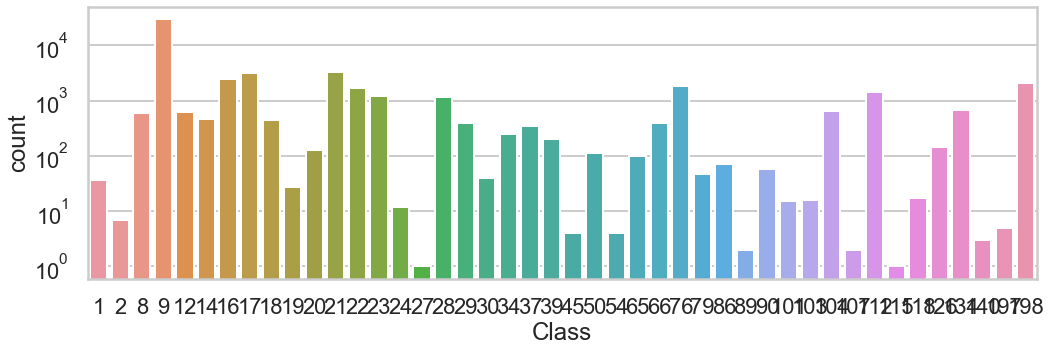

In [62]:
target = data_norm['Class']
train = data_norm.drop(["Class"], axis=1)
plt.figure(figsize=(17,5))
sns.set(style='whitegrid')
#titi= sns.load_dataset("shsh")
sns.set_context("poster")
ax = sns.countplot(x="Class", data=data_norm)


ax.set_yscale("log")

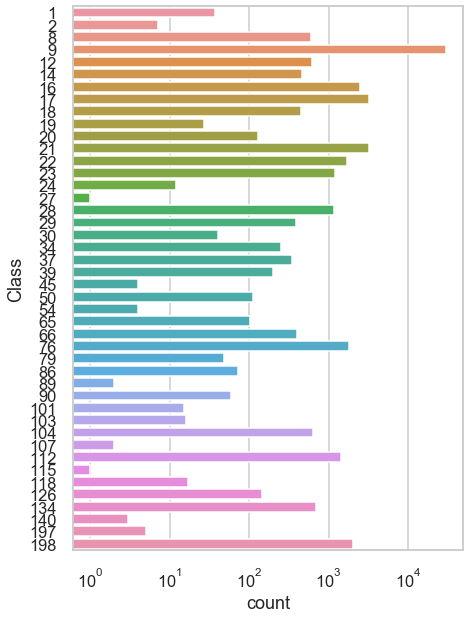

In [45]:
plt.figure(figsize=(7,10))
ax = sns.countplot(y="Class", data=data_norm)
ax.set_xscale("log")
sns.set_context("talk")

In [7]:
import math

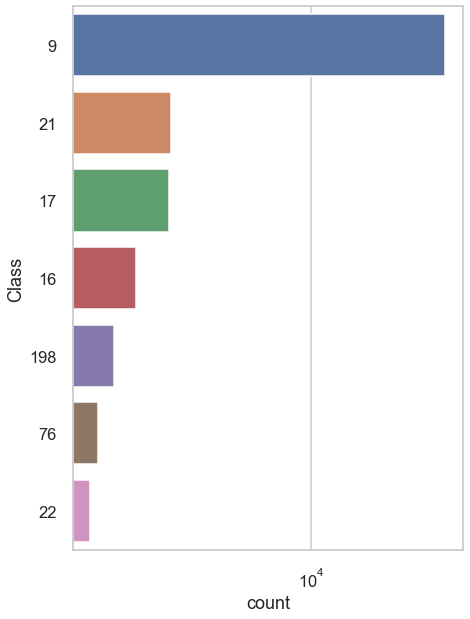

In [64]:


plt.figure(figsize=(7,10))
ax = sns.countplot(y="Class", data=data_norm1, 
                  order = data_norm1['Class'].value_counts().index)
sns.set_style("whitegrid")
ax.set_xscale("log")
sns.set_context("talk")

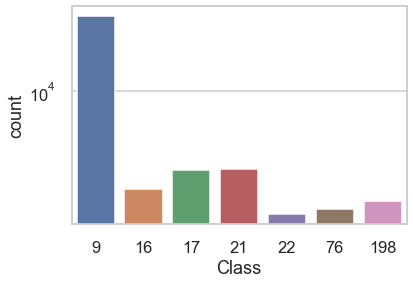

In [55]:
target = data_norm1['Class']
train = data_norm1.drop(["Class", "ClassA"], axis=1)
sns.set_style('whitegrid')

g = sns.countplot(target)
g.set_yscale("log")

## 보루타 알고리즘

In [25]:
X=train.values
y=target.values

In [33]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

y = y.ravel()

# define random forest classifier, with utilising all cores and
# sampling in proportion to y labels
rf = RandomForestClassifier(n_jobs=-1, class_weight=None, max_depth=7)

# define Boruta feature selection method
feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1)

# find all relevant features - 5 features should be selected
feat_selector.fit(X, y)

# check selected features - first 5 features are selected
feat_selector.support_

# check ranking of features
feat_selector.ranking_

# call transform() on X to filter it down to selected features
X_filtered = feat_selector.transform(X)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	88
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	88
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	88
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	88
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	88
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	88
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	88
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	87
Tentative: 	1
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	87
Tentative: 	1
Rejected: 	0
Iteration: 	10 / 100
Confirmed: 	87
Tentative: 	1
Rejected: 	0
Iteration: 	11 / 100
Confirmed: 	87
Tentative: 	1
Rejected: 	0
Iteration: 	12 / 100
Confirmed: 	88
Tentative: 	0
Rejected: 	0


BorutaPy finished running.

Iteration: 	13 / 100
Confirmed: 	88
Tentative: 	0
Rejected: 	0


In [35]:
pd.DataFrame(X_filtered).head()

,0,1,2,3,4,5,6,7,8,9,...,78,79,80,81,82,83,84,85,86,87
0,0.526749,0.181915,0.140669,-0.346589,-0.180358,0.331979,0.307206,0.322429,0.199948,-0.037474,...,-0.008259,-0.059336,-0.031124,-0.039956,-0.036018,-0.078628,0.100906,-0.058413,-0.070170,-0.175392
1,0.098116,0.058149,0.026571,0.024711,-0.180358,0.208192,0.037070,0.052293,-0.026352,-0.037474,...,-0.008259,-0.045376,-0.043512,-0.050097,-0.031701,-0.076728,0.167506,-0.058413,-0.066237,0.324608
2,0.002959,-0.054551,-0.031972,0.024711,-0.180358,0.095473,-0.007013,-0.107800,-0.026352,-0.037474,...,-0.008259,-0.028693,0.089385,0.093642,-0.029793,0.005972,-0.342294,-0.038653,-0.047006,0.324608
3,0.049466,-0.015055,-0.015126,0.064811,-0.180358,0.134976,-0.007013,-0.043995,-0.026352,-0.037474,...,-0.008259,-0.054059,0.000728,0.023756,-0.053185,-0.059628,-0.017394,-0.058413,-0.067767,0.324608
4,-0.016543,-0.066297,-0.031972,-0.037789,-0.180358,0.083724,-0.059218,-0.043995,-0.026352,-0.037474,...,-0.008259,-0.135264,-0.049882,-0.103889,-0.056297,-0.106028,0.347706,-0.058413,-0.070170,-0.175392


## Novelty Detection

In [69]:
def func(data_norm) :
    if data_norm['Class'] == 9 or data_norm['Class'] == 21 or data_norm['Class'] == 17 \
    or data_norm['Class'] == 16 or data_norm['Class'] == 198 or data_norm['Class'] == 76 \
    or data_norm['Class'] == 22 :
        return data_norm['Class']
    else : return 200
data_norm['ClassA'] = data_norm.apply(func, axis = 1)
data_norm1 = data_norm[data_norm['ClassA'] != 200]

data_norm1.head(5)

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,Class,ClassA
0,0.704672,0.613381,0.602628,0.3787,0.0,0.613485,0.826649,0.826649,0.6131,0.0,...,0.036100,0.088404,0.135428,0.0328,0.7236,0.00000,0.000000,0.5,17,17.0
1,0.276039,0.489615,0.488530,0.7500,0.0,0.489699,0.556513,0.556513,0.3868,0.0,...,0.023713,0.078263,0.139745,0.0347,0.7902,0.00000,0.003934,1.0,21,21.0
2,0.180883,0.376915,0.429988,0.7500,0.0,0.376979,0.512430,0.396420,0.3868,0.0,...,0.156609,0.222002,0.141652,0.1174,0.2804,0.01976,0.023164,1.0,9,9.0
3,0.227390,0.416411,0.446834,0.7901,0.0,0.416482,0.512430,0.460225,0.3868,0.0,...,0.067953,0.152116,0.118261,0.0518,0.6053,0.00000,0.002404,1.0,21,21.0
4,0.161380,0.365169,0.429988,0.6875,0.0,0.365231,0.460225,0.460225,0.3868,0.0,...,0.017342,0.024471,0.115149,0.0054,0.9704,0.00000,0.000000,0.5,9,9.0


In [70]:
train, test = train_test_split(data_norm1, test_size = 0.3)
x_train = train.drop(['Class','ClassA'], axis=1)
y_train = train['Class']
x_test = test.drop(['Class','ClassA'], axis=1)
y_test = test['Class']

In [71]:
def func2(data_norm1) :
    if data_norm1['Class'] == 9 : return 0
    else : return 1
data_norm1['ClassA'] = data_norm1.apply(func2, axis = 1)
train, test = train_test_split(data_norm1, test_size = 0.3)
x_train = train.drop(['Class','ClassA'], axis=1)
y_train = train['ClassA']
x_test = test.drop(['Class','ClassA'], axis=1)
y_test = test['ClassA']

In [72]:
data_norm1.head()

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,Class,ClassA
0,0.704672,0.613381,0.602628,0.3787,0.0,0.613485,0.826649,0.826649,0.6131,0.0,...,0.036100,0.088404,0.135428,0.0328,0.7236,0.00000,0.000000,0.5,17,1
1,0.276039,0.489615,0.488530,0.7500,0.0,0.489699,0.556513,0.556513,0.3868,0.0,...,0.023713,0.078263,0.139745,0.0347,0.7902,0.00000,0.003934,1.0,21,1
2,0.180883,0.376915,0.429988,0.7500,0.0,0.376979,0.512430,0.396420,0.3868,0.0,...,0.156609,0.222002,0.141652,0.1174,0.2804,0.01976,0.023164,1.0,9,0
3,0.227390,0.416411,0.446834,0.7901,0.0,0.416482,0.512430,0.460225,0.3868,0.0,...,0.067953,0.152116,0.118261,0.0518,0.6053,0.00000,0.002404,1.0,21,1
4,0.161380,0.365169,0.429988,0.6875,0.0,0.365231,0.460225,0.460225,0.3868,0.0,...,0.017342,0.024471,0.115149,0.0054,0.9704,0.00000,0.000000,0.5,9,0


### 클래스 많은것이 0, 아닌게 1 인거야

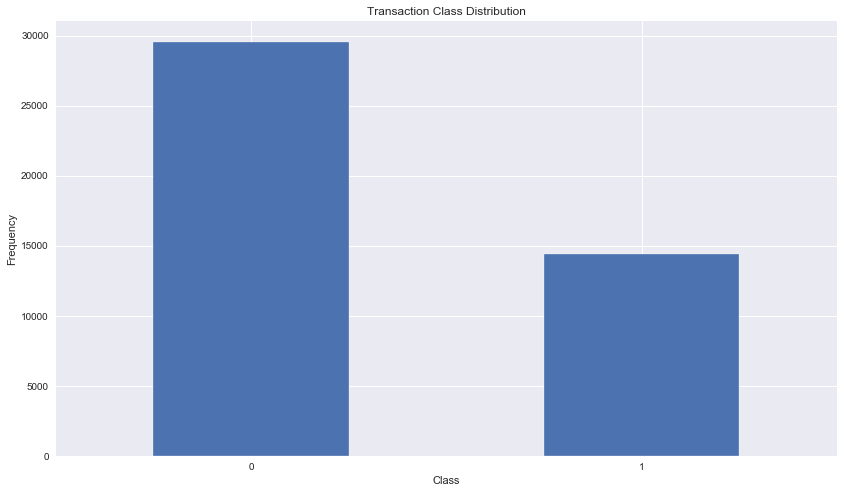

In [73]:
count_classes = pd.value_counts(data_norm1['ClassA'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency");


In [74]:
columns = data_norm1.columns.tolist()
columns = [c for c in columns if c not in ["ClassA"]]
X = data_norm1[columns]
Y=data_norm1['ClassA']

In [75]:
state = np.random.RandomState(42)
Fraud = data_norm1[data_norm1['ClassA']==1]
Valid = data_norm1[data_norm1['ClassA']==0]
outlier_fraction = len(Fraud)/float(len(Valid))
classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X), 
                                       contamination=outlier_fraction,random_state=state, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction),
    "Support Vector Machine":OneClassSVM(kernel='rbf', degree=3, gamma=0.1,nu=0.05, 
                                         max_iter=-1, random_state=state)
   
}

In [76]:
#Fit the model


n_outliers = len(Fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X)
        y_pred = clf.predict(X)
    else:    
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != Y).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(Y,y_pred))
    print("Classification Report :")
    print(classification_report(Y,y_pred))

Isolation Forest: 20907
Accuracy Score :
0.5247112848958807
Classification Report :
              precision    recall  f1-score   support

           0       0.69      0.53      0.60     29571
           1       0.35      0.52      0.42     14417

    accuracy                           0.52     43988
   macro avg       0.52      0.52      0.51     43988
weighted avg       0.58      0.52      0.54     43988

Local Outlier Factor: 22367
Accuracy Score :
0.49152041465854324
Classification Report :
              precision    recall  f1-score   support

           0       0.66      0.50      0.57     29571
           1       0.31      0.47      0.38     14417

    accuracy                           0.49     43988
   macro avg       0.49      0.49      0.47     43988
weighted avg       0.55      0.49      0.51     43988

Support Vector Machine: 13560
Accuracy Score :
0.6917341093025371
Classification Report :
              precision    recall  f1-score   support

           0       0.69     